This notebook is intended to demonstrate how vessel segmentation methods of ITKTubeTK can be applied to an MRA scan.   This approach produces only modest results, unless (1) the image is extremely good quality (e.g., consistent and high contrast between vessels and background), (2) the image natively has nearly isotropic voxels, (3) any and every "bright" voxel corresponds to a vessel to be modeled (e.g., will not be selective to intracranial vessels unless the data has already been skull stripped).

In [1]:
import itk
from itk import TubeTK as ttk

from itkwidgets import view

import numpy as np

In [2]:
ImageType = itk.Image[itk.F, 3]

im1 = itk.imread("../Data/MRI-Cases/mra.mha", itk.F)

In [2]:
# Ensure the data has isotropic voxels to simplify 3D computations
resampler = ttk.ResampleImage.New( Input=im1, MakeHighResIso=True )
resampler.Update()
im1iso = resampler.GetOutput()

itkImageF4 not loaded from module TubeTK because of exception:
 module 'itk.TubeTKPython' has no attribute 'itkImageF4'
vectoritkImageF4 not loaded from module TubeTK because of exception:
 module 'itk.TubeTKPython' has no attribute 'vectoritkImageF4'



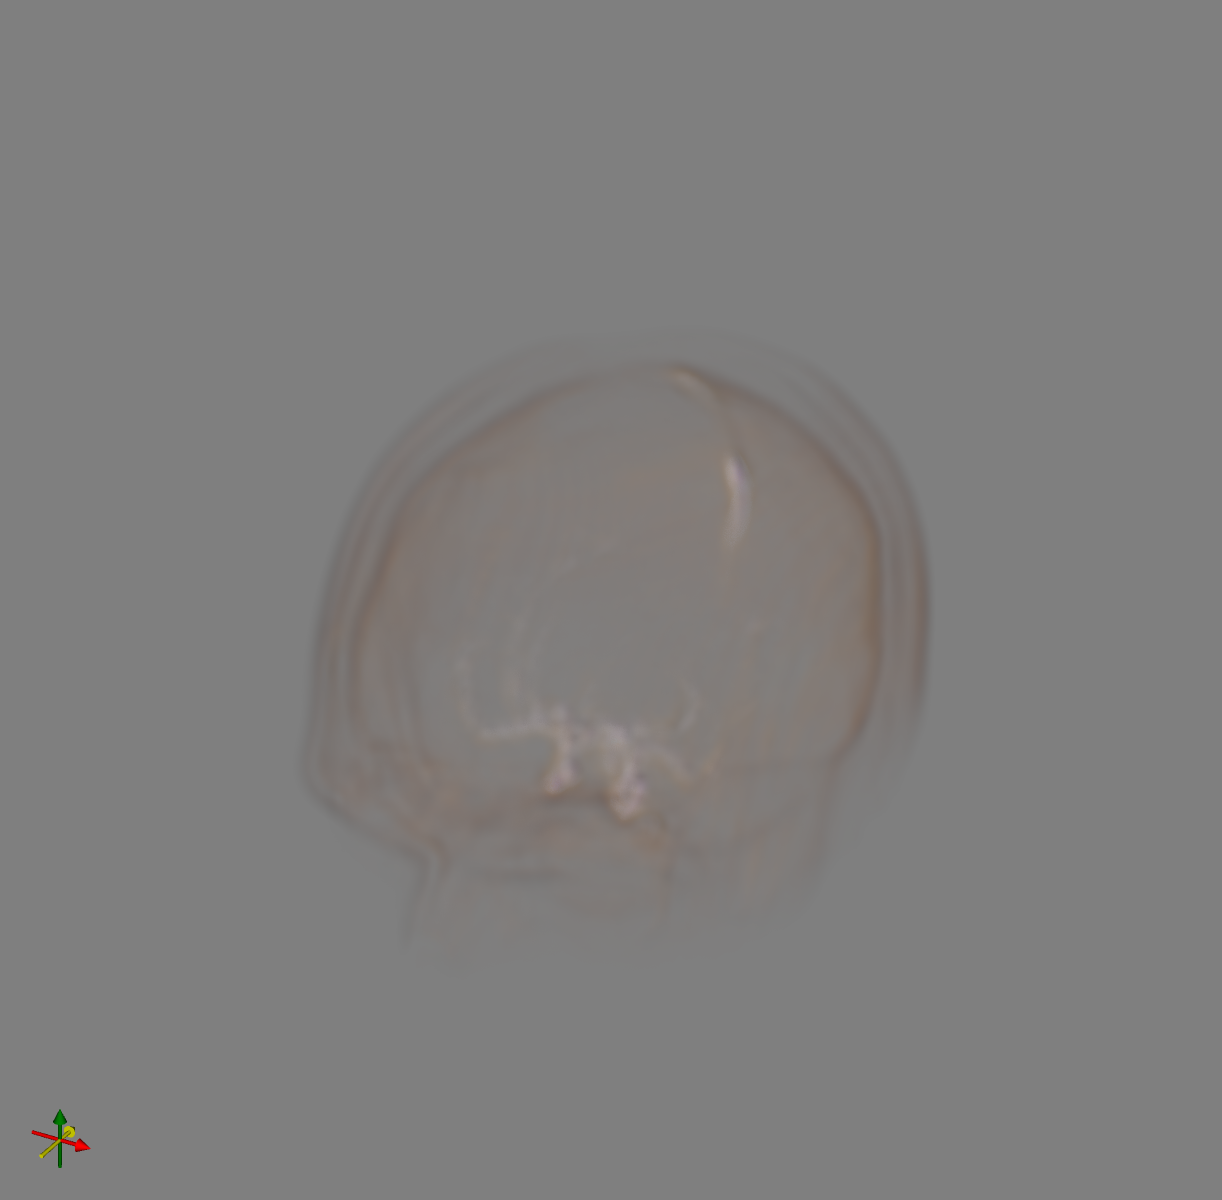
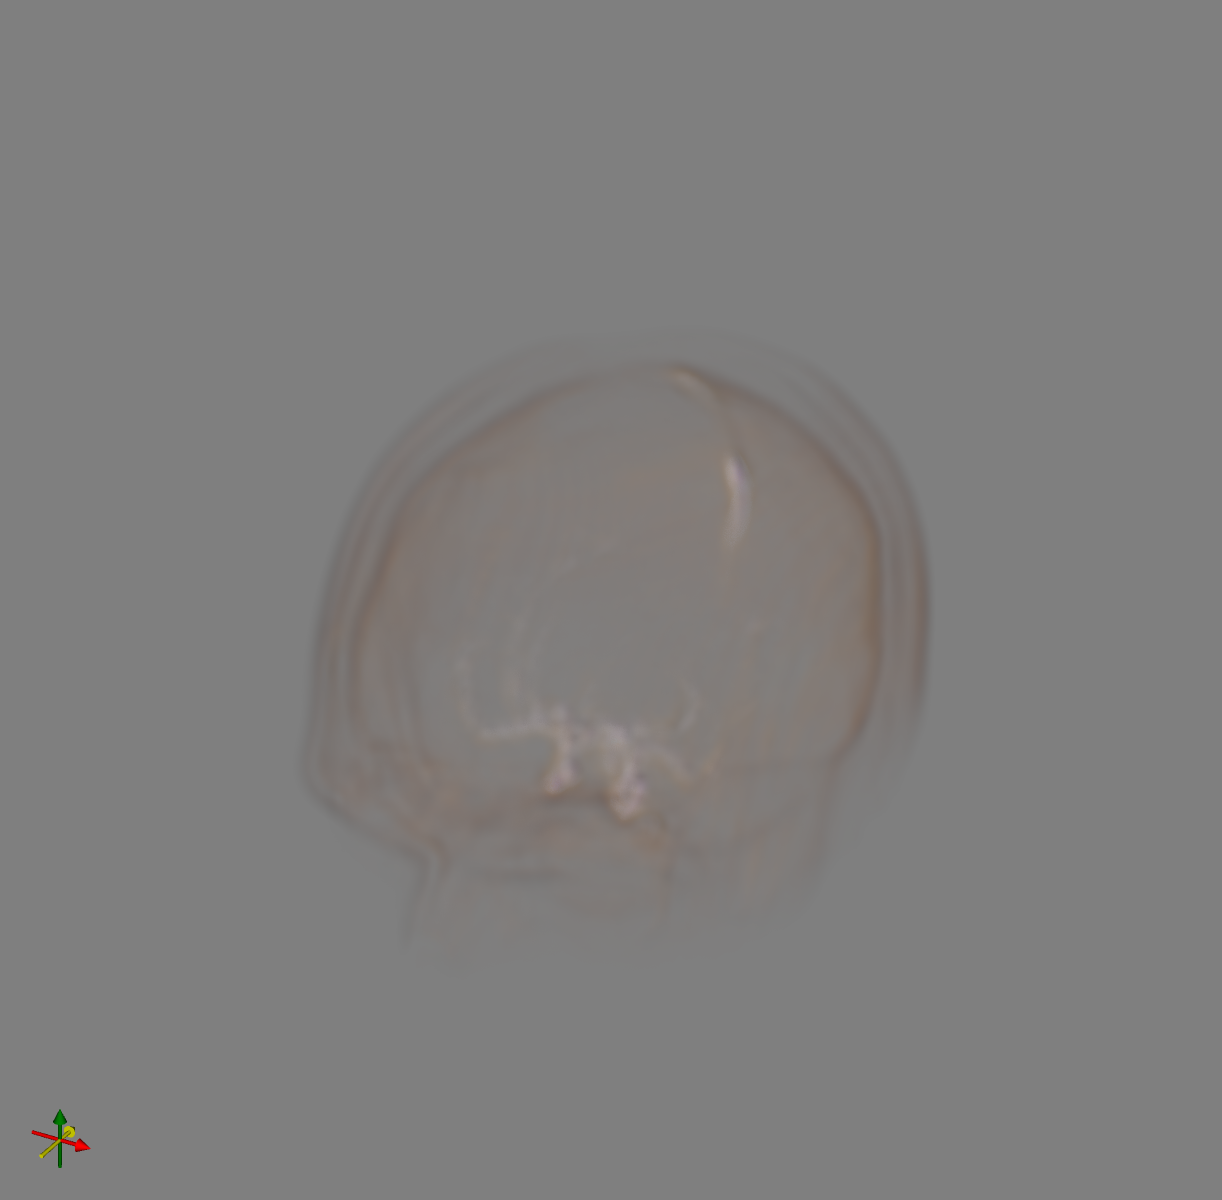

<IPython.core.display.Javascript object>

In [3]:
# Visualize the image using itkwidgets 3D / 2D viewer
view(im1iso)

In [7]:
imMath = ttk.ImageMath.New( Input=im1iso )
imMath.Blur(1)
imBlur = imMath.GetOutput()

In [8]:
# For the demo, we will only use 40 seed points - extracting at most 40 vessels.
numSeeds = 40

In [9]:
vSeg = ttk.SegmentTubes[ImageType].New()
vSeg.SetInput(im1iso)
#vSeg.SetVerbose(True)
vSeg.SetMinCurvature(0.0)
vSeg.SetMinRoundness(0.01)
vSeg.SetRadiusInObjectSpace( 1 )
vSeg.SetRadiusMin(1)
vSeg.SetRadiusMax(8)
vSeg.SetDataMinMaxLimits(50,256)
vSeg.SetSeedMask( imBlur )
vSeg.SetUseSeedMaskAsProbabilities(True)
vSeg.SetSeedMaskMaximumNumberOfPoints( numSeeds )

vSeg.ProcessSeeds()


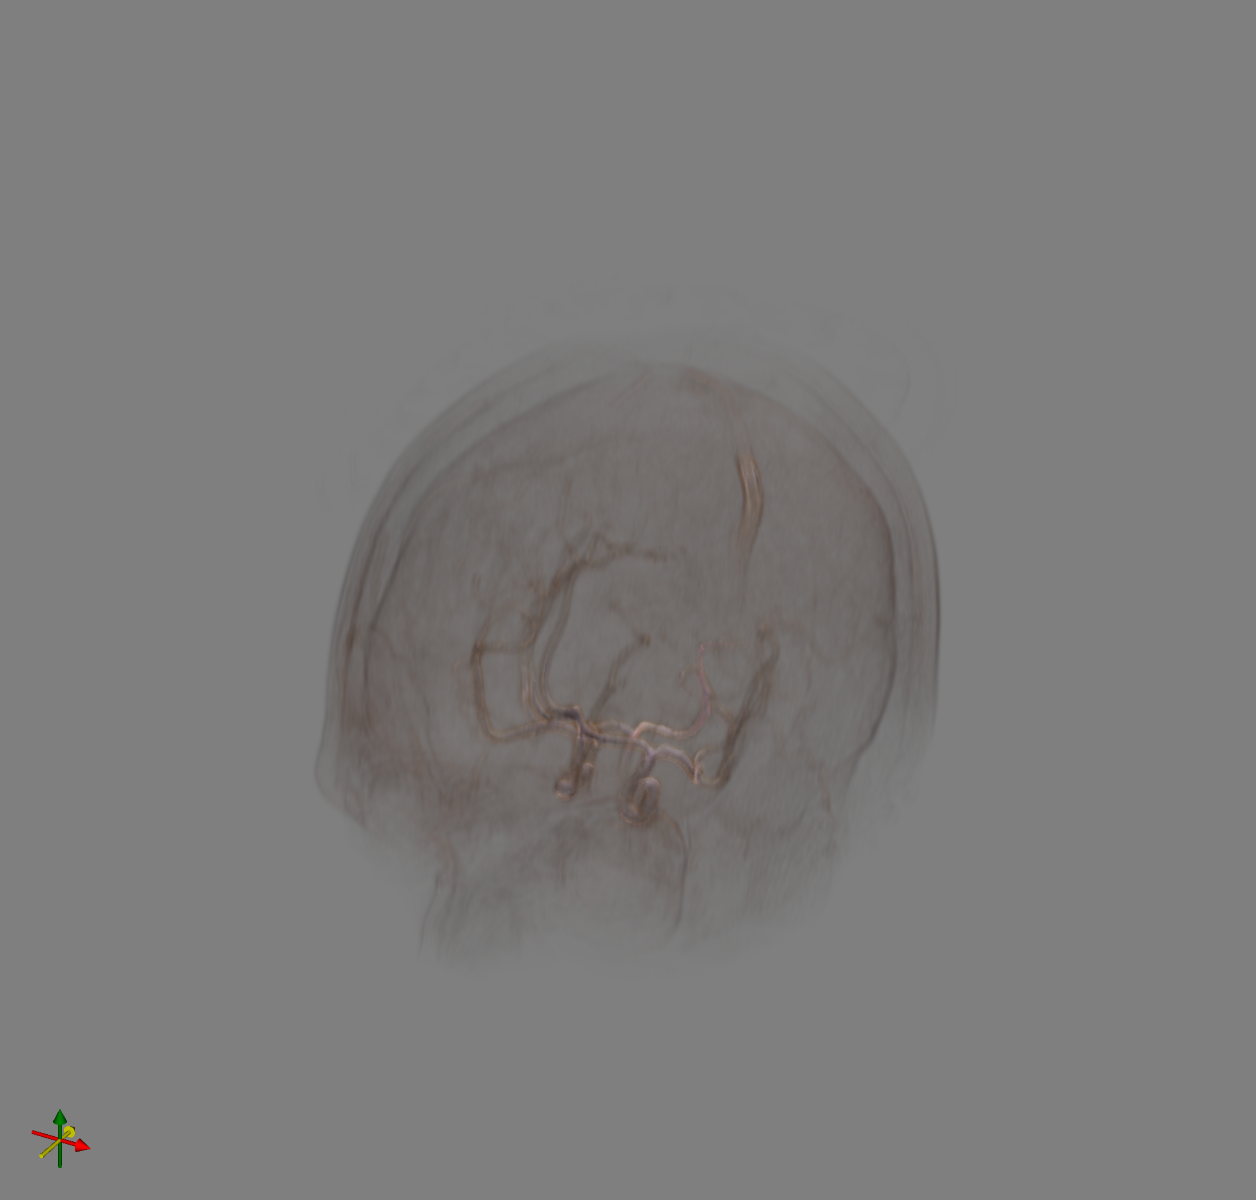
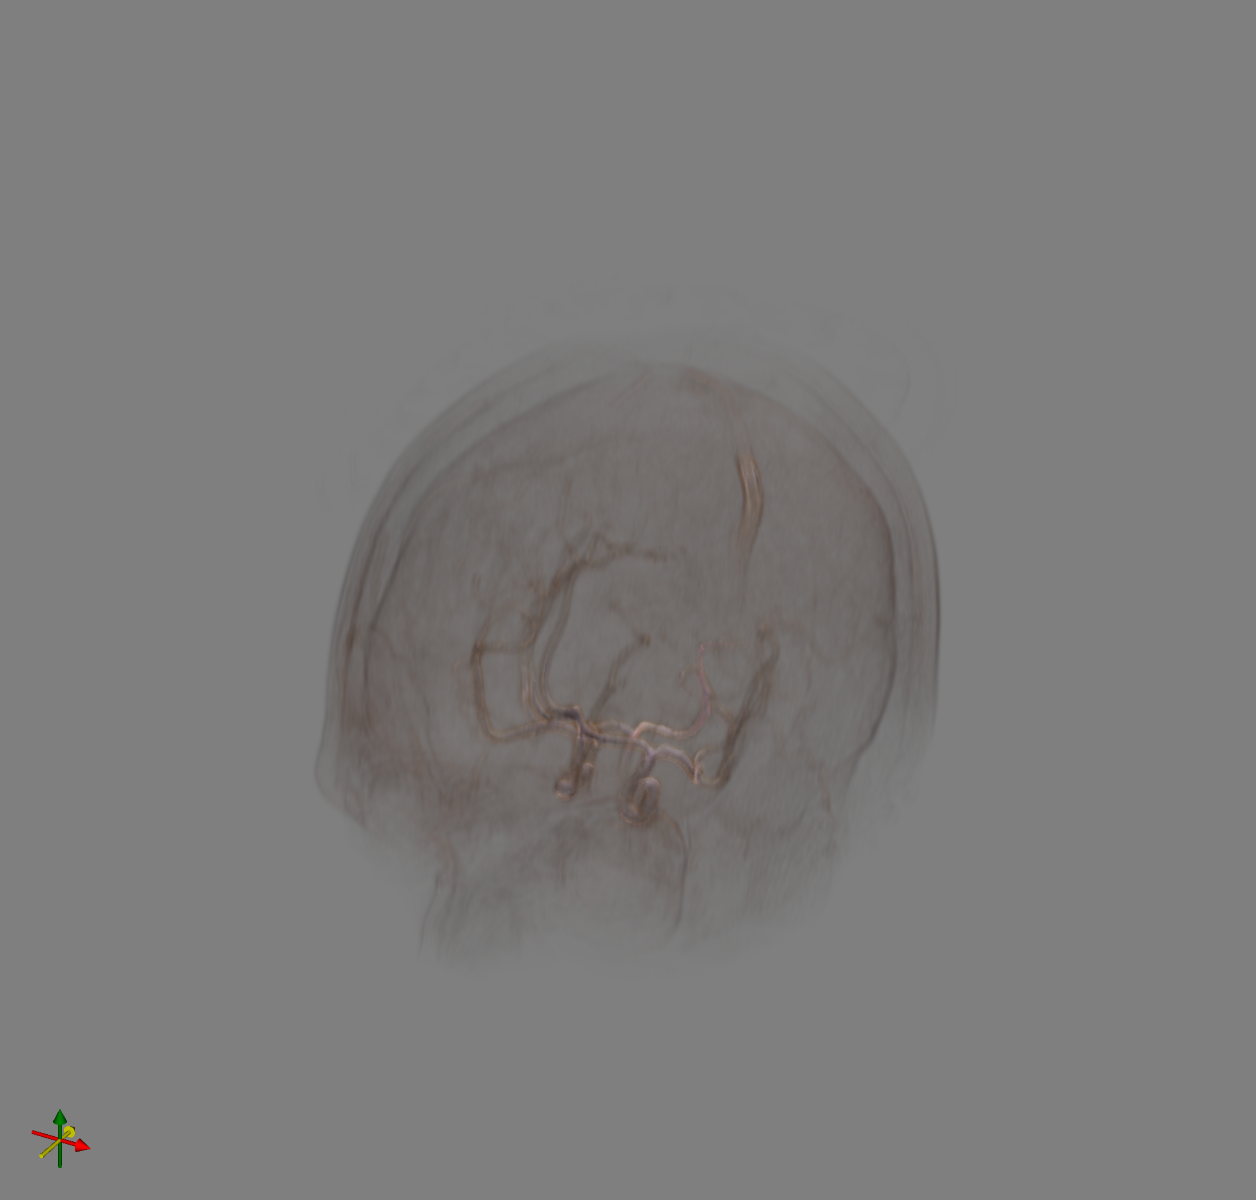

<IPython.core.display.Javascript object>

In [10]:
tubeMaskImage = vSeg.GetTubeMaskImage()
#view(tubeMaskImage)
view(image=im1iso, label_image=tubeMaskImage)

In [12]:
SOWriter = itk.SpatialObjectWriter[3].New(vSeg.GetTubeGroup())
SOWriter.SetFileName("Demo-SegmentBrightVessels.tre")
SOWriter.Update()

In [13]:
itk.imwrite(tubeMaskImage, "Demo-SegmentBrightVessels.mha")